#Preparing data

Import all needed libraries.



In [117]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
import tensorflow.keras.backend as K
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import os
import joblib


Download the database and label the column names as described in the database.

In [2]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data.gz',names=['Elevation', 'Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points','Wilderness_Area_1','Wilderness_Area_2','Wilderness_Area_3','Wilderness_Area_4','Soil_Type_1','Soil_Type_2','Soil_Type_3','Soil_Type_4','Soil_Type_5','Soil_Type_6','Soil_Type_7','Soil_Type_8','Soil_Type_9','Soil_Type_10','Soil_Type_11','Soil_Type_12','Soil_Type_13','Soil_Type_14','Soil_Type_15','Soil_Type_16','Soil_Type_17','Soil_Type_18','Soil_Type_19','Soil_Type_20','Soil_Type_21','Soil_Type_22','Soil_Type_23','Soil_Type_24','Soil_Type_25','Soil_Type_26','Soil_Type_27','Soil_Type_28','Soil_Type_29','Soil_Type_30','Soil_Type_31','Soil_Type_32','Soil_Type_33','Soil_Type_34','Soil_Type_35','Soil_Type_36','Soil_Type_37','Soil_Type_38','Soil_Type_39','Soil_Type_40','Cover_Type' ])

I check the basic information about the data: the number of columns (features), which column contains the target data, how many samples are in the set, what type of data they are and whether there are any missing data.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area_1                   581012 non-null  int64
 11  Wilderness_Area_2                   581012 non-null 

Check how many unique classes are in the dataset.

In [6]:
data['Cover_Type'].unique()

array([5, 2, 1, 7, 3, 6, 4])

Check if the data is balanced. You can see that the number of samples with labels 1 and 2 is much larger than the other labels. I will carry out two model learning processes:

1.   On unbalanced data, but on a much larger data set
2.   On balanced data, but smaller set (14000 samples)

<Axes: >

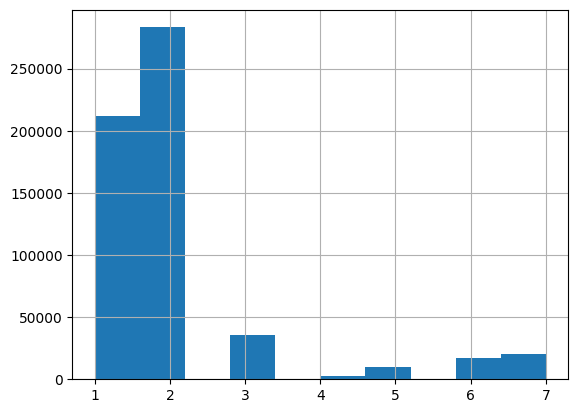

In [7]:
data['Cover_Type'].hist()

Use the factorize() function to create a column where the labels are labeled [0, 1, 2, 3, 4, 5, 6] because the model expects classes to be labeled that way during the model training process.

In [3]:
data['target'] = data['Cover_Type'].factorize()[0]

Create a list of features that will be used to train the model.

In [4]:
feats = ['Elevation',
         'Aspect',
         'Slope',
         'Horizontal_Distance_To_Hydrology',
         'Vertical_Distance_To_Hydrology',
         'Horizontal_Distance_To_Roadways',
         'Hillshade_9am',
         'Hillshade_Noon',
         'Hillshade_3pm', 
         'Horizontal_Distance_To_Fire_Points',
         'Wilderness_Area_1',
         'Wilderness_Area_2',
         'Wilderness_Area_3',
         'Wilderness_Area_4',
         'Soil_Type_1',
         'Soil_Type_2',
         'Soil_Type_3',
         'Soil_Type_4',
         'Soil_Type_5',
         'Soil_Type_6',
         'Soil_Type_7',
         'Soil_Type_8',
         'Soil_Type_9',
         'Soil_Type_10',
         'Soil_Type_11',
         'Soil_Type_12',
         'Soil_Type_13',
         'Soil_Type_14',
         'Soil_Type_15',
         'Soil_Type_16',
         'Soil_Type_17',
         'Soil_Type_18',
         'Soil_Type_19',
         'Soil_Type_20',
         'Soil_Type_21',
         'Soil_Type_22',
         'Soil_Type_23',
         'Soil_Type_24',
         'Soil_Type_25',
         'Soil_Type_26',
         'Soil_Type_27',
         'Soil_Type_28',
         'Soil_Type_29',
         'Soil_Type_30',
         'Soil_Type_31',
         'Soil_Type_32',
         'Soil_Type_33',
         'Soil_Type_34',
         'Soil_Type_35',
         'Soil_Type_36',
         'Soil_Type_37',
         'Soil_Type_38',
         'Soil_Type_39',
         'Soil_Type_40']

Create a feature matrix X and a list of labels y.

In [5]:
def get_X_y(feats):
    X = data[ feats ].values
    y = data['target'].values

    return X, y

X, y = get_X_y(feats)

Create the feature matrix X and the list of labels y on a balanced dataset.

In [6]:
X,y = get_X_y(feats)
 
labels = data['target'].unique()
labels_amount = []
for label in labels:
  idx_label = np.where(label == y)[0]
  labels_amount.append(idx_label.shape[0])

idx_class_0 = np.where(label == 0)[0]

amount = 2000

X_balanced = np.zeros((1,54))
y_balanced = np.zeros((1,1))
for label in labels:
  idx_class = np.where(label == y)[0]
  idx_class_balanced = np.random.choice(idx_class, amount)
  X_tmp = X[idx_class_balanced,:]
  y_tmp = y[idx_class_balanced].reshape((amount,1))
 
  X_balanced = np.vstack((X_balanced, X_tmp))
  y_balanced = np.vstack((y_balanced, y_tmp))

y_balanced = y_balanced.reshape((y_balanced.shape[0],))

X_balanced = np.delete(X_balanced, 0, 0)
y_balanced = np.delete(y_balanced, 0, 0)


idx_shuffled = np.arange(1, y_balanced.shape[0])
np.random.shuffle(idx_shuffled)


X_balanced = X_balanced[idx_shuffled, :]
y_balanced = y_balanced[idx_shuffled]



Check if the dataset is really balanced.

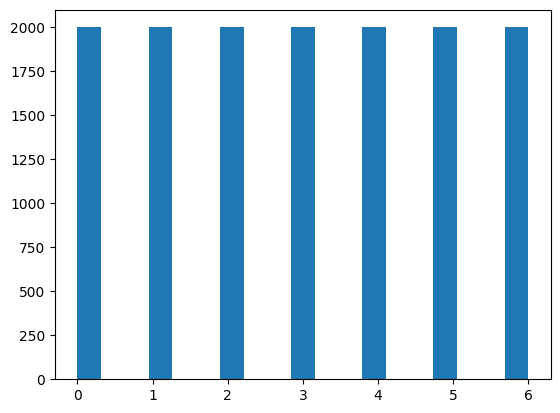

In [12]:
plt.hist(y_balanced, bins='auto')
plt.show()

Create variables for training, validation and test data.

In [7]:
X_balanced_train, X_balanced_val, y_balanced_train, y_balanced_val = train_test_split(X_balanced, y_balanced, test_size=0.2)
X_balanced_val, X_balanced_test, y_balanced_val, y_balanced_test = train_test_split(X_balanced_val, y_balanced_val, test_size=0.5)

y_balanced_cat_train = to_categorical(y_balanced_train)
y_balanced_cat_val = to_categorical(y_balanced_val)
y_balanced_cat_test = to_categorical(y_balanced_test)

In [8]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5)

y_cat_train = to_categorical(y_train)
y_cat_val = to_categorical(y_val)
y_cat_test = to_categorical(y_test)

In [9]:
num_classes = len(data['target'].unique())

# Useful functions

Funkcja tworząca wykres dla modelu sieci neuronowej, która przedstawia proces uczenia się przy użyciu metryki accuracy oraz funkcji straty.

In [11]:
def draw_learning_curve(history, key='accuracy'):

  fig, ax = plt.subplots(1, 2, figsize=(12,6))
  ax[0].plot(history.history[key])
  ax[0].plot(history.history['val_'+ key] )
  ax[0].set_ylabel(key.title())
  ax[0].set_xlabel('Epoch')
  ax[0].legend(['train', 'val'])

  ax[1].plot(history.history['loss'])
  ax[1].plot(history.history['val_loss'] )
  ax[1].set_ylabel('loss'.title())
  ax[1].set_xlabel('Epoch')
  ax[1].legend(['train', 'val'])
  fig.suptitle('Learning curve')
  plt.show()


Funkcja tworząca confusion matrix, czyli zestawienie etykiet predykowanych przez wytrenowany model oraz etykiet prawdziwych ze zbioru danych.

In [62]:
def get_confusion_matrix(model_type, data_type, model, X_test, y_test):
  title_string = 'model: ' + model_type + ' | ' + 'data type: ' + data_type
  print(title_string)
  y_pred = model.predict(X_test)

  if(model_type== 'Neural Network'):
    pred_labels=[]
    for idx in range(len(y_pred)):
      pred_label = np.argmax(y_pred[idx])
      pred_labels.append(pred_label)

  true_labels = y_test
  score = accuracy_score(true_labels, pred_labels)

  ConfusionMatrixDisplay.from_predictions(true_labels, pred_labels, normalize='true')

  return score 

The function in which I initialize, compile and train the model. The function returns:

* trained model
* training history
* the best epoch, i.e. the number of the epoch in which the succes metric on the validation data reached the highest score
* the result achieved by the succes metric on training data in the best epoch
* the result achieved by the loss function on the training data in the best epoch
* highest succes metric score on validation data
* the result achieved by the loss function on the validation data in the best epoch







In [13]:
def train_model(X_train, y_train, X_val, y_val, hyperparameters):
  epochs, batch_size, learning_rate = hyperparameters
  input_size = 54
  model = Sequential([
    Dense(2*input_size, input_dim=input_size, activation='relu'),
    Dense(3*input_size, activation='relu'),
    Dense(4*input_size, activation='relu'),
    Dropout(0.1),
    Dense(num_classes, activation='softmax')
  ])
  
  opt = keras.optimizers.Adam(learning_rate=learning_rate)

  model.compile(loss='categorical_crossentropy', optimizer=opt, metrics='accuracy')
  callback = keras.callbacks.EarlyStopping(monitor='loss', patience=5) #I use EarlyStopping (don't set hyperparameter)
  history = model.fit(X_train, y_train,
          batch_size=batch_size, epochs=epochs, callbacks=[callback], verbose=1,
          validation_data=(X_val, y_val))
  
  best_epoch = np.argmax(history.history['val_accuracy'])
  best_val_accuracy = history.history['val_accuracy'][best_epoch]
  best_val_loss = history.history['val_loss'][best_epoch]
  train_accuracy = history.history['accuracy'][best_epoch]
  train_loss = history.history['loss'][best_epoch]


  return model, history, best_epoch, train_accuracy, train_loss, best_val_accuracy, best_val_loss


Function, which allows you to train the model using different hyperparameters to find the best configuration.
The function returns:

* a trained model that achieve the highest metric score using selected hyperparameters
* data in pandas dataframe, in which hyperparameters and the result of learning using them were saved, which later facilitates the comparison of learning processes of all models
* the history of training the best model, which can later be presented by plot
* best batch size
* best leraning rate



In [121]:
def hyperparameters_grid_search(data_type, X_train, y_train, X_val, y_val, batch_sizes, learning_rates, mach_epochs):
  hyperparameters_data = []
  new_val_accuracy = 0
  for idx_lr, lr in enumerate(learning_rates):
    for idx_batch_size, batch_size in enumerate(batch_sizes):
      hyperparameters = [max_epochs, batch_size, lr]
      print("="*10)
      print("="*10)
      print("learning_rate  = " + str(lr) + " | " + str(idx_lr+1) + " / " + str(len(learning_rates)) )
      print("batch_size = " + str(batch_size) + " | " + str(idx_batch_size+1) + " / " + str(len(batch_sizes)) )
      model, training_history, best_epoch, train_accuracy, train_loss, best_val_accuracy, best_val_loss = train_model(X_train, y_train, X_val, y_val, hyperparameters)
      
      if(best_val_accuracy > new_val_accuracy):
        new_val_accuracy = best_val_accuracy
        best_plot, best_lr, best_batch_size = training_history, lr, batch_size
        best_NN_model = model
        if(data_type == 'balanced'):
          best_NN_model.save('/content/output_balanced/NN_model_balanced_batch_size{}_lr{}.h5'.format(best_batch_size, best_lr))
        elif(data_type == 'unbalanced'):
          best_NN_model.save('/content/output/NN_model_batch_size{}_lr{}.h5'.format(best_batch_size, best_lr))
        else:
          print('DATA TYPE ERROR! You can choose: balanced or unbalanced')


        hyperparameters_dict = {
          'learning_rate' : lr,
          'batch_size' : batch_size,
          'best_val_accuracy': best_val_accuracy,
          'best_val_loss': best_val_loss,
          'train_accuracy': train_accuracy,
          'train_loss': train_loss,
          'best_epoch': best_epoch,
          'max_epochs' : max_epochs,
          'training_history': training_history
        }
        hyperparameters_data.append(hyperparameters_dict)
      
      else:
        hyperparameters_dict = {
          'learning_rate' : lr,
          'batch_size' : batch_size,
          'best_val_accuracy': best_val_accuracy,
          'best_val_loss': best_val_loss,
          'train_accuracy': train_accuracy,
          'train_loss': train_loss,
          'best_epoch': best_epoch,
          'max_epochs' : max_epochs,
          'training_history': training_history
        }
        hyperparameters_data.append(hyperparameters_dict)

  dataframe_training = pd.DataFrame(hyperparameters_data)
  return best_NN_model, dataframe_training, best_plot, best_lr, best_batch_size

# Training models on unbalanced data

The given lists of hyperparameters will be used to train the models. In order to find the optimal number of epochs, I used the keras.callbacks.EarlyStopping function, which will cause the model to stop training if there is no significant progress in the success metric for a certain number of epochs.

Training models, searching for the most optimal parameters.

In [15]:
batch_sizes = [256, 512, 1024]
learning_rates = [0.001, 0.0005, 0.0001]
max_epochs = 100

best_NN_model, dataframe_training, best_plot, best_lr, best_batch_size = hyperparameters_grid_search('unbalanced', X_train, y_cat_train, X_val, y_cat_val, batch_sizes, learning_rates, max_epochs)

learning_rate  = 0.001 | 1 / 3
batch_size = 256 | 1 / 3
Epoch 1/100
1816/1816 [==============================] - 14s 7ms/step - loss: 1.9715 - accuracy: 0.6018 - val_loss: 0.7260 - val_accuracy: 0.6994
Epoch 2/100
1816/1816 [==============================] - 14s 8ms/step - loss: 0.7521 - accuracy: 0.6768 - val_loss: 0.6810 - val_accuracy: 0.6963
Epoch 3/100
1816/1816 [==============================] - 13s 7ms/step - loss: 0.6894 - accuracy: 0.7019 - val_loss: 0.6889 - val_accuracy: 0.6914
Epoch 4/100
1816/1816 [==============================] - 13s 7ms/step - loss: 0.6595 - accuracy: 0.7141 - val_loss: 0.7006 - val_accuracy: 0.6974
Epoch 5/100
1816/1816 [==============================] - 13s 7ms/step - loss: 0.6251 - accuracy: 0.7283 - val_loss: 0.5863 - val_accuracy: 0.7388
Epoch 6/100
1816/1816 [==============================] - 13s 7ms/step - loss: 0.5976 - accuracy: 0.7390 - val_loss: 0.5723 - val_accuracy: 0.7459
Epoch 7/100
1816/1816 [==============================] - 13s 7ms/ste

Plot of the learning process (success metrics and loss function) for the best model trained on unbalanced data.The graph shows that the network did not overfit. The model will achieve a high accuracy score and a very low loss function score.

HYPERPARAMETERS | Bach_size: 1024 Learning_rate: 0.001 


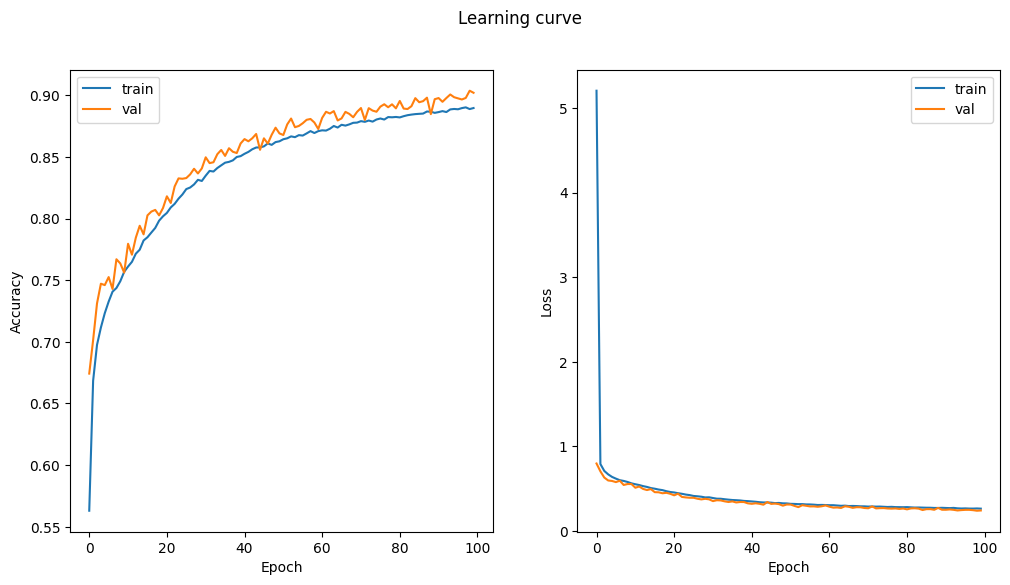

In [120]:
print('HYPERPARAMETERS | Bach_size: {} Learning_rate: {} '.format(best_batch_size, best_lr))
draw_learning_curve(best_plot)

Confusion matrix for the best model trained for unbalanced data.The confusion matrix shows that the model correctly predicts the classes. It performs the worst with label 0, because it predicts label 1 in its place.

model: Neural Network | data type: unbalanced
1816/1816 [==============================] - 3s 1ms/step


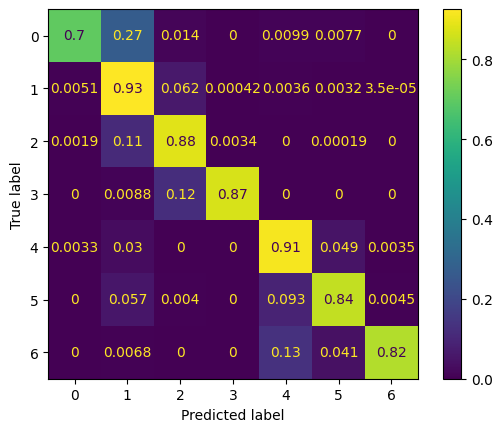

In [63]:
NN_score = get_confusion_matrix('Neural Network', 'unbalanced', best_NN_model, X_test, y_test)

# Training models on balanced data

Training models, searching for the most optimal parameters.

In [18]:
batch_sizes = [256, 512, 1024]
learning_rates = [0.001, 0.0005, 0.0001]
max_epochs = 100

best_NN_model_balanced, dataframe_training_balanced, best_plot_balanced, best_lr_balanced, best_batch_size_balanced = hyperparameters_grid_search('balanced', X_balanced_train, y_balanced_cat_train, X_balanced_val, y_balanced_cat_val, batch_sizes, learning_rates, max_epochs)

learning_rate  = 0.001 | 1 / 3
batch_size = 256 | 1 / 3
Epoch 1/100
44/44 [==============================] - 1s 12ms/step - loss: 51.8614 - accuracy: 0.2307 - val_loss: 9.8343 - val_accuracy: 0.3436
Epoch 2/100
44/44 [==============================] - 0s 8ms/step - loss: 9.7058 - accuracy: 0.3119 - val_loss: 3.0931 - val_accuracy: 0.4171
Epoch 3/100
44/44 [==============================] - 0s 8ms/step - loss: 3.6578 - accuracy: 0.3671 - val_loss: 1.9101 - val_accuracy: 0.4400
Epoch 4/100
44/44 [==============================] - 0s 8ms/step - loss: 1.8867 - accuracy: 0.4263 - val_loss: 1.4852 - val_accuracy: 0.4893
Epoch 5/100
44/44 [==============================] - 0s 8ms/step - loss: 1.5505 - accuracy: 0.4505 - val_loss: 1.3264 - val_accuracy: 0.4929
Epoch 6/100
44/44 [==============================] - 0s 8ms/step - loss: 1.4062 - accuracy: 0.4764 - val_loss: 1.2455 - val_accuracy: 0.5107
Epoch 7/100
44/44 [==============================] - 0s 8ms/step - loss: 1.2981 - accuracy: 0.50

Plot of the learning process (success metrics and loss function) for the best model trained on balanced data.The graph shows that the network did not overlearn. The accuracy score is much lower than in the case of an unbalanced data set, and the result of the loss function is much higher than in the case of unbalanced data set. The network on balanced data learned much faster due to the smaller amount of data, but in the case of the success metric it performs worse.

HYPERPARAMETERS | Bach_size_balanced: 256 Learning_rate_balanced: 0.001


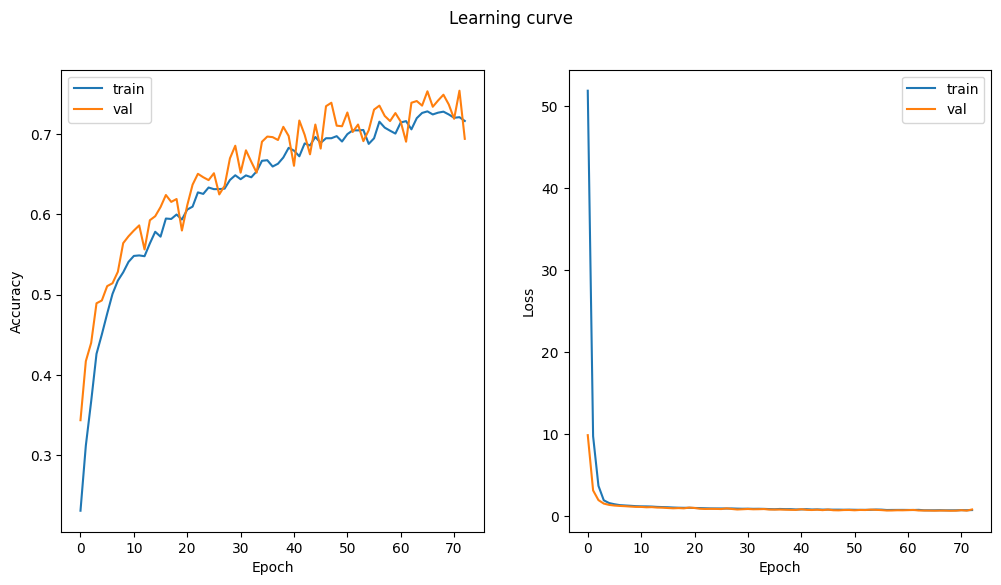

In [122]:
print('HYPERPARAMETERS | Bach_size_balanced: {} Learning_rate_balanced: {}'.format(best_batch_size_balanced, best_lr_balanced))
draw_learning_curve(best_plot_balanced)

Confusion matrix plot for the best model trained for balanced data. The confusion matrix shows that the model incorrectly predicts labels: 1, 2, 4, 5.

model: Neural Network | data type: balanced
44/44 [==============================] - 0s 6ms/step


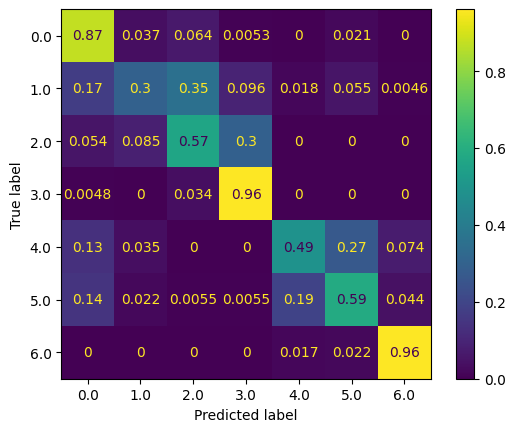

In [64]:
NN_score_balanced = get_confusion_matrix('Neural Network', 'balanced', best_NN_model_balanced, X_balanced_test, y_balanced_test)

# Training classic machine learning models and the heuristic model - Dummy model

A function that allows you to train the model and calculate the result of the success metric. It then creates a confusion matrix and a bar chart showing the performance of three models: Dummy, Decision tree, Random forest. The function will also save the trained models to the output folder.

In [123]:
def get_models():
    
    models = [('dummy', DummyClassifier(strategy='stratified')),
        ('decision_tree', DecisionTreeClassifier(max_depth=10)),
        ('random_forest', RandomForestClassifier(n_estimators=50, max_depth=10, random_state=0)),
    ]
    
    return models

def plot_results(result, scoring):

    result = sorted(result, key=lambda x: x[1])

    ys = [i[1] for i in result]
    xs_labels = [i[0] for i in result]
    xs = range(len(xs_labels))
    
    plt.figure(figsize=(15, 5))
    plt.title('best model={}, {}={}'.format(xs_labels[-1], scoring, ys[-1] ), fontsize=14)
    plt.xlabel('models')
    plt.ylabel(scoring)
    plt.bar(xs, ys)
    plt.xticks(xs, xs_labels, rotation=90)
    

def run_models(data_type, X_train, y_train, X_test, y_test, scoring, cv=3, plot_result=True):
       
    result = []
    cv = StratifiedKFold(n_splits=cv, shuffle=True, random_state=0)
    
    num_cols = 4

    for it, (model_name, model) in enumerate(get_models()):
        
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        ConfusionMatrixDisplay.from_predictions(
        y_test, y_pred, normalize='true')

        test_score = accuracy_score(y_test, y_pred)

        print("model={}, {}: {}".format(model_name, scoring, test_score))

        if(data_type == 'balanced'):
          joblib.dump(model, '/content/output_balanced/{}_balanced.joblib'.format(model_name))
        elif(data_type == 'unbalanced'):
          joblib.dump(model, '/content/output/{}.joblib'.format(model_name))
        else:
          print('DATA TYPE ERROR! You can choose: balanced or unbalanced')
        
        result.append((model_name, test_score))
        plt.show()
        
    if plot_result:
        plot_results(result, scoring)

    
    return result

The success metric and the confusion matrix look best for the Decision tree model. The confusion matrix shows that the Dummy model most often predicts labels 1 and 2 because they are the largest groups in the unbalanced dataset.

model=dummy, accuracy: 0.3787477195277271


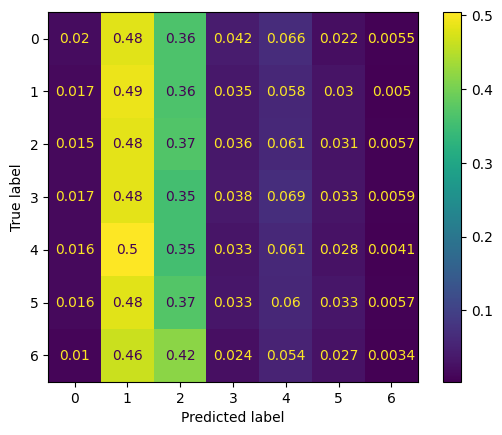

model=decision_tree, accuracy: 0.7757564283501428


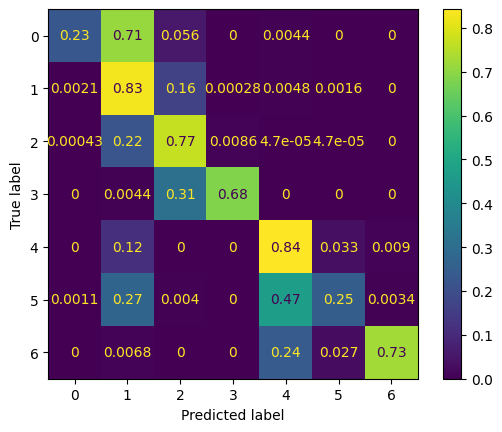

model=random_forest, accuracy: 0.7481498055144401


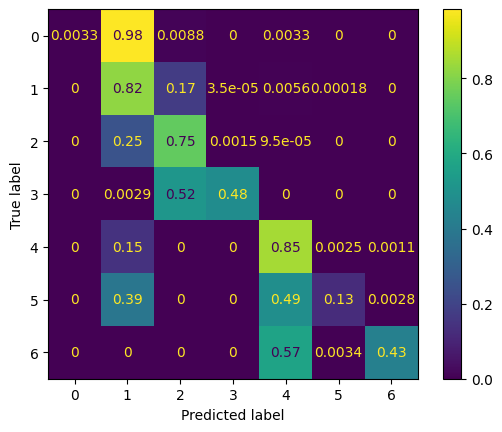

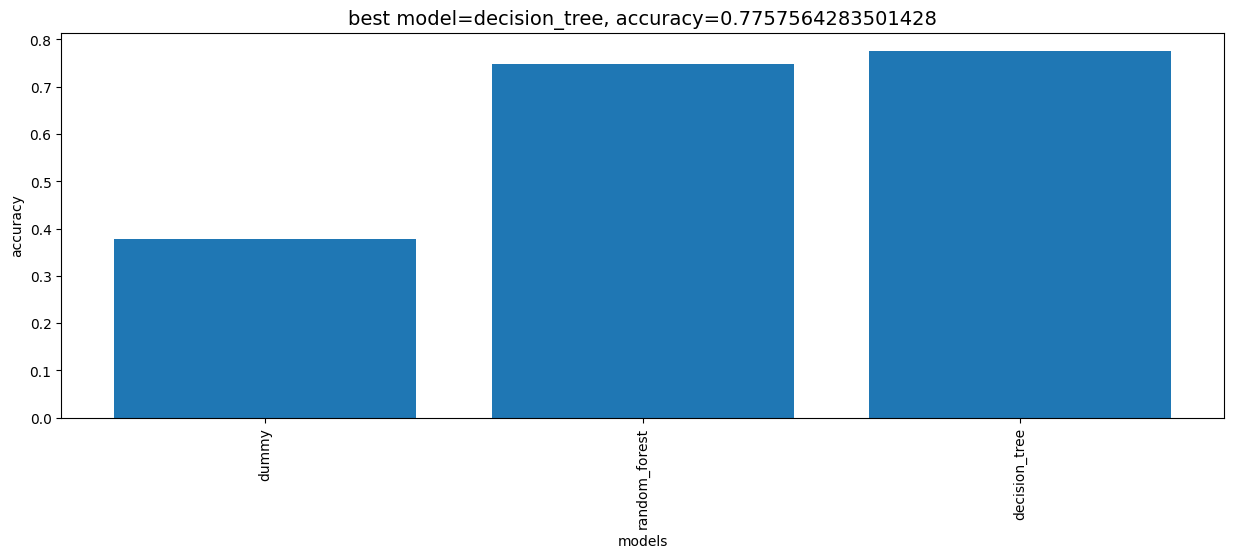

In [124]:
result = run_models('unbalanced', X_train, y_train, X_test, y_test, scoring='accuracy')

For a balanced dataset, the Random forest model performs best with the highest success metric score. Also, the confusion matrix for Random forest and Decision Tree models looks better than when using an unbalanced dataset.

model=dummy, accuracy: 0.15714285714285714


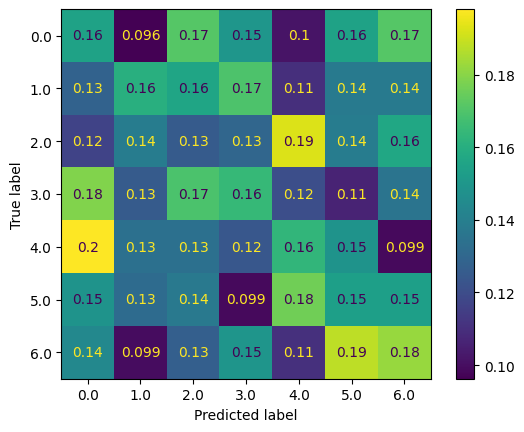

model=decision tree, accuracy: 0.7428571428571429


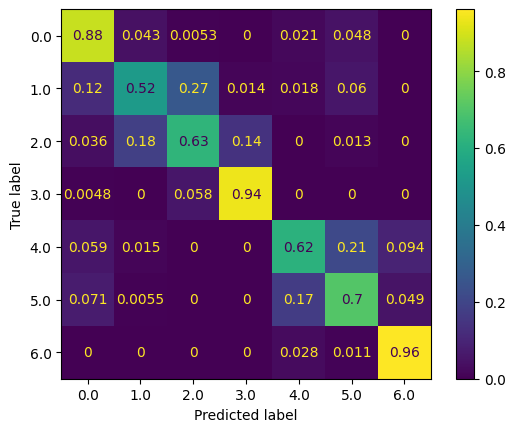

model=random forest, accuracy: 0.775


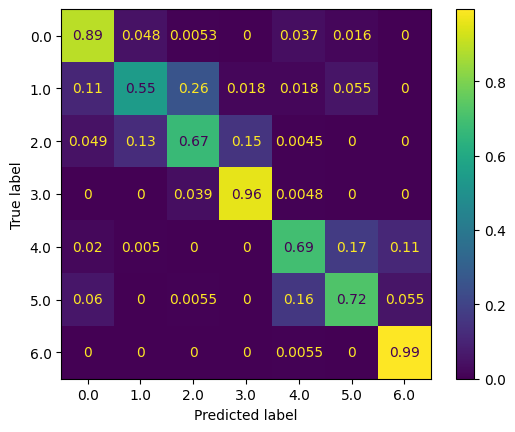

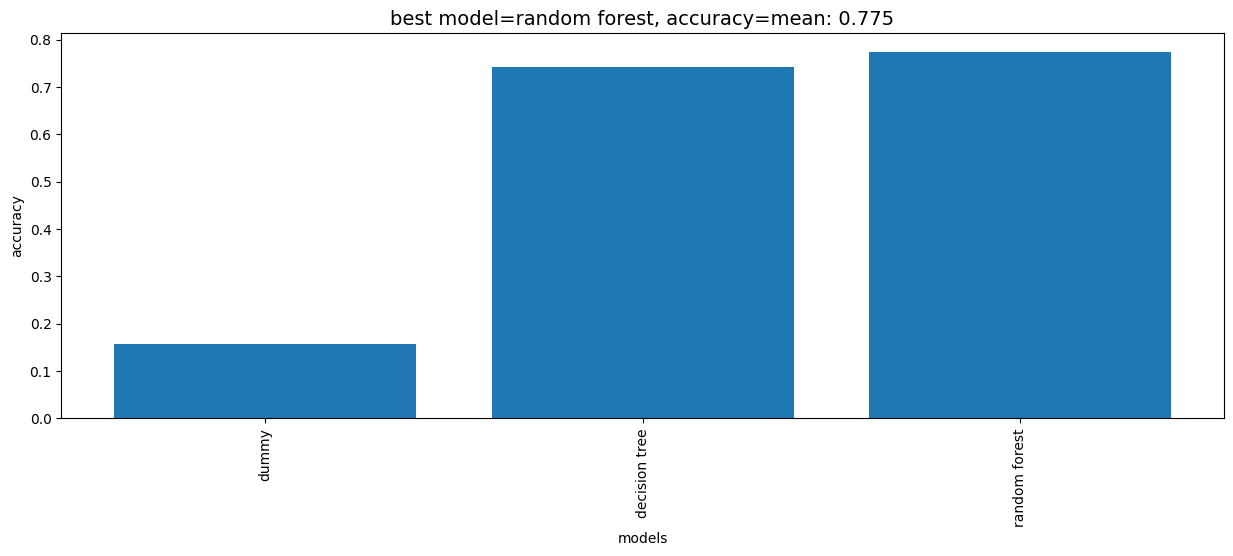

In [110]:
result_balanced = run_models('balanced', X_balanced_train, y_balanced_train, X_balanced_test, y_balanced_test,scoring='accuracy', plot_result=True)

# Comparison of all models

Comparison of models trained on an unbalanced dataset using the success metric: accuracy. The Neural Network model achieved the highest score.

In [112]:
models_score = [["Dummy_model", result[0][1]] ,
                ['Decision_tree', result[1][1]],
                ['Random_forest', result[2][1]],
                ['NN_model', NN_score]] 

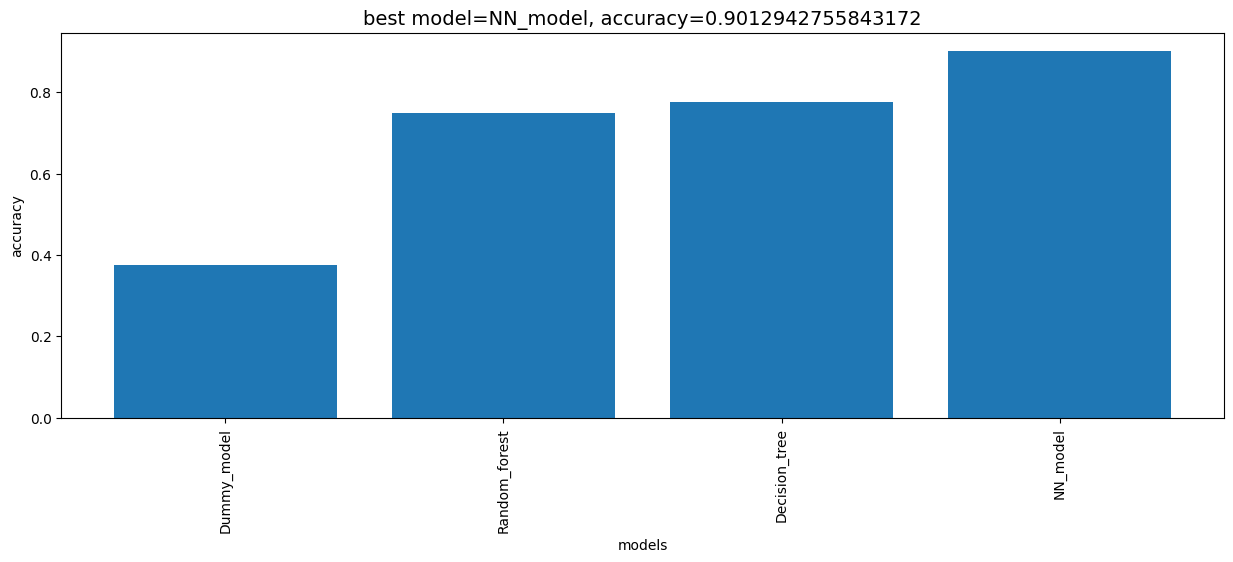

In [113]:
plot_results(models_score, 'accuracy')

Comparison of models trained on a balanced dataset using the success metric: accuracy. The Random forest model achieved the highest score.

In [114]:
models_score_balanced = [["Dummy_model", result_balanced[0][1]] ,
                ['Decision_tree', result_balanced[1][1]],
                ['Random_forest', result_balanced[2][1]],
                ['NN_model', NN_score_balanced]] 

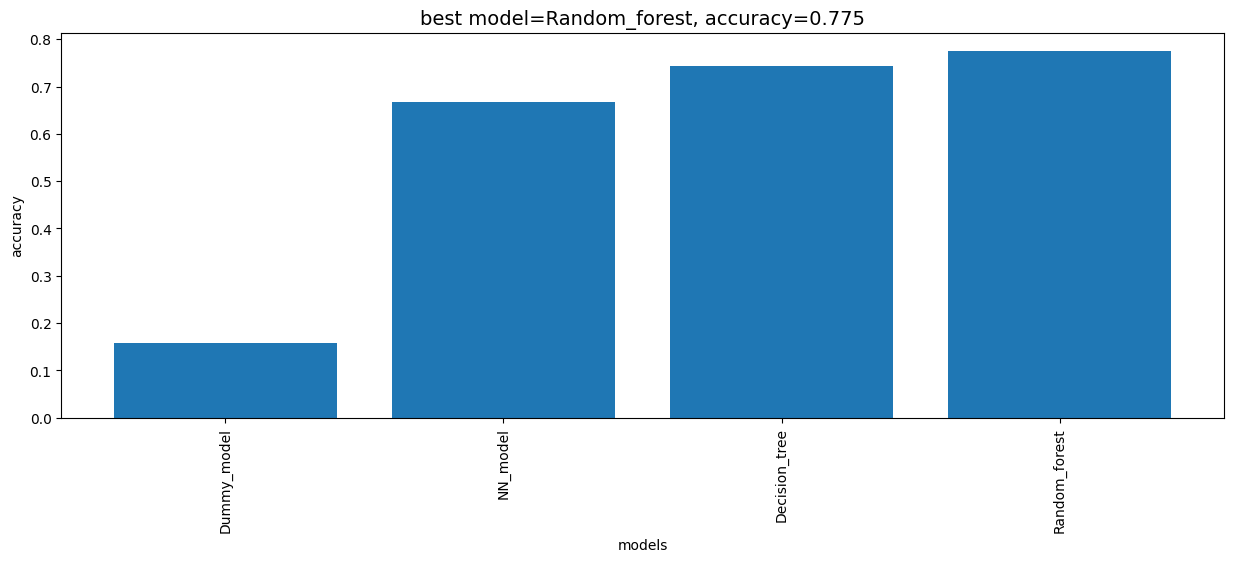

In [115]:
plot_results(models_score_balanced, 'accuracy')

I propose to use the following models for prediction: 

1.   dummy.joblib,
2.   decision_tree_balanced.joblib,
3.   random_forest_balanced.joblib,
4.   NN_model_batch_size1024_lr0.001.h5





## Flask


In [ ]:
from flask import Flask, request, jsonify

app = Flask(__name__)

def dummy_model(input_data):
  X = input_data

  model = joblib.load("/content/output/dummy.joblib")
  pred = model.predict([X])
      
  return pred

def decision_tree_model(input_data):
  X = input_data

  model = joblib.load("/content/output_balanced/decision_tree_balanced.joblib")
  pred = model.predict([X])
      
  return pred

def random_forest_model(input_data):
  X = input_data

  model = joblib.load("/content/output_balanced/random_forest_balanced.joblib")
  pred = model.predict([X])
      
  return pred

def NN_model(input_data):

  X = [input_data]

  model = load_model('/content/output/NN_model_batch_size1024_lr0.001.h5')

  preds = model.predict(X)
  pred = np.argmax(preds)
      
  return pred


@app.route('/api/predict', methods=['POST'])
def predict():
    # Get the model type from the API call
    model_type = request.args.get('model_type')

    # Get the input features
    input_data = request.get_json()

    # Call the appropriate model
    if model_type == 'heuristic':
        prediction = dummy_model(input_data)
    elif model_type == 'decision tree':
        prediction = decision_tree_model(input_data)
    elif model_type == 'random forest':
        prediction = random_forest_model(input_data)
    elif model_type == 'neural_network':
        prediction = NN_model(input_data)
    else:
        return jsonify({'error': 'Invalid model type. You can choose: heuristic, decision tree, random forest or neural network'})

    # Return the prediction as a JSON response
    return jsonify({'prediction': prediction})

if __name__ == '__main__':
    app.run(debug=True)